In [1]:
# import dependencies 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from scipy.stats import sem
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
# read raw data
csvpath = os.path.join("../Data/World_happiness_report/2017.csv")
happy_df = pd.read_csv(csvpath)
happy_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
# select countries that we chose as a group
selected_countries = ["United States","Mexico","Venezuela","Brazil","South Africa","Nigeria","Poland","Sweden","Russia","China","South Korea","Australia"]
happy_select_df = happy_df[happy_df.Country.isin(selected_countries)]
happy_select_df = happy_select_df.reset_index(drop=True)
happy_select_df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
1,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211
2,United States,14,6.993,7.074657,6.911343,1.546259,1.419921,0.774287,0.505741,0.392579,0.135639,2.218113
3,Brazil,22,6.635,6.725470,6.544531,1.107353,1.431306,0.616552,0.437454,0.162350,0.111093,2.769267
4,Mexico,25,6.578,6.671149,6.484851,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155
5,Poland,46,5.973,6.053908,5.892092,1.291788,1.445712,0.699475,0.520342,0.158466,0.059308,1.797723
6,Russia,49,5.963,6.030275,5.895725,1.281778,1.469282,0.547349,0.373783,0.052264,0.032963,2.205607
7,South Korea,55,5.838,5.922559,5.753441,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283,1.880378
8,China,79,5.273,5.319278,5.226721,1.081166,1.160837,0.741416,0.472788,0.028807,0.022794,1.764939
9,Venezuela,82,5.250,5.370032,5.129968,1.128431,1.431338,0.617144,0.153997,0.065020,0.064491,1.789464


In [4]:
# read clean data for annual working hours 
csvpath = os.path.join("../Data/Working_hours/clean_annual_hours.csv")
annual_hours_df = pd.read_csv(csvpath)
annual_hours_df.head()

,Unnamed: 0,Entity,Code,Year,Average annual hours worked by persons engaged (hours per person engaged)
0,68,Australia,AUS,1950,2178.2456
1,69,Australia,AUS,1951,2158.1013
2,70,Australia,AUS,1952,2138.1436
3,71,Australia,AUS,1953,2118.3701
4,72,Australia,AUS,1954,2098.7798


In [5]:
# select the countries, delete empty column 
annual_hours_selected_df = annual_hours_df[annual_hours_df.Entity.isin(selected_countries)]
del annual_hours_selected_df["Unnamed: 0"]
annual_hours_selected_df.columns=["Country","Code","Year","Annual hours worked per person"]
annual_hours_selected_df

,Country,Code,Year,Annual hours worked per person
0,Australia,AUS,1950,2178.2456
1,Australia,AUS,1951,2158.1013
2,Australia,AUS,1952,2138.1436
3,Australia,AUS,1953,2118.3701
4,Australia,AUS,1954,2098.7798
...,...,...,...,...
581,Venezuela,VEN,2002,1829.0203
582,Venezuela,VEN,2003,1801.2109
583,Venezuela,VEN,2004,1896.6949
584,Venezuela,VEN,2005,1922.8501


In [6]:
# select 2017 for working hours 
annual_hours_2017 = annual_hours_selected_df.loc[annual_hours_selected_df["Year"] == 2017]
annual_hours_2017

,Country,Code,Year,Annual hours worked per person
67,Australia,AUS,2017,1731.4943
135,Brazil,BRA,2017,1709.4856
183,China,CHN,2017,2174.3501
251,Mexico,MEX,2017,2255.0000
259,Nigeria,NGA,2017,1827.2401
284,Poland,POL,2017,2028.4952
310,Russia,RUS,2017,1974.0000
327,South Africa,ZAF,2017,2209.0916
392,South Korea,KOR,2017,2063.3315
460,Sweden,SWE,2017,1609.2896


In [7]:
# merge the two data sets 
happy_hours_df = pd.merge(happy_select_df, annual_hours_2017, on="Country")
happy_hours_df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Code,Year,Annual hours worked per person
0,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,SWE,2017,1609.2896
1,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,AUS,2017,1731.4943
2,United States,14,6.993,7.074657,6.911343,1.546259,1.419921,0.774287,0.505741,0.392579,0.135639,2.218113,USA,2017,1757.2255
3,Brazil,22,6.635,6.725470,6.544531,1.107353,1.431306,0.616552,0.437454,0.162350,0.111093,2.769267,BRA,2017,1709.4856
4,Mexico,25,6.578,6.671149,6.484851,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,MEX,2017,2255.0000
5,Poland,46,5.973,6.053908,5.892092,1.291788,1.445712,0.699475,0.520342,0.158466,0.059308,1.797723,POL,2017,2028.4952
6,Russia,49,5.963,6.030275,5.895725,1.281778,1.469282,0.547349,0.373783,0.052264,0.032963,2.205607,RUS,2017,1974.0000
7,South Korea,55,5.838,5.922559,5.753441,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283,1.880378,KOR,2017,2063.3315
8,China,79,5.273,5.319278,5.226721,1.081166,1.160837,0.741416,0.472788,0.028807,0.022794,1.764939,CHN,2017,2174.3501
9,Nigeria,95,5.074,5.209500,4.938500,0.783756,1.215770,0.056916,0.394953,0.230947,0.026122,2.365391,NGA,2017,1827.2401


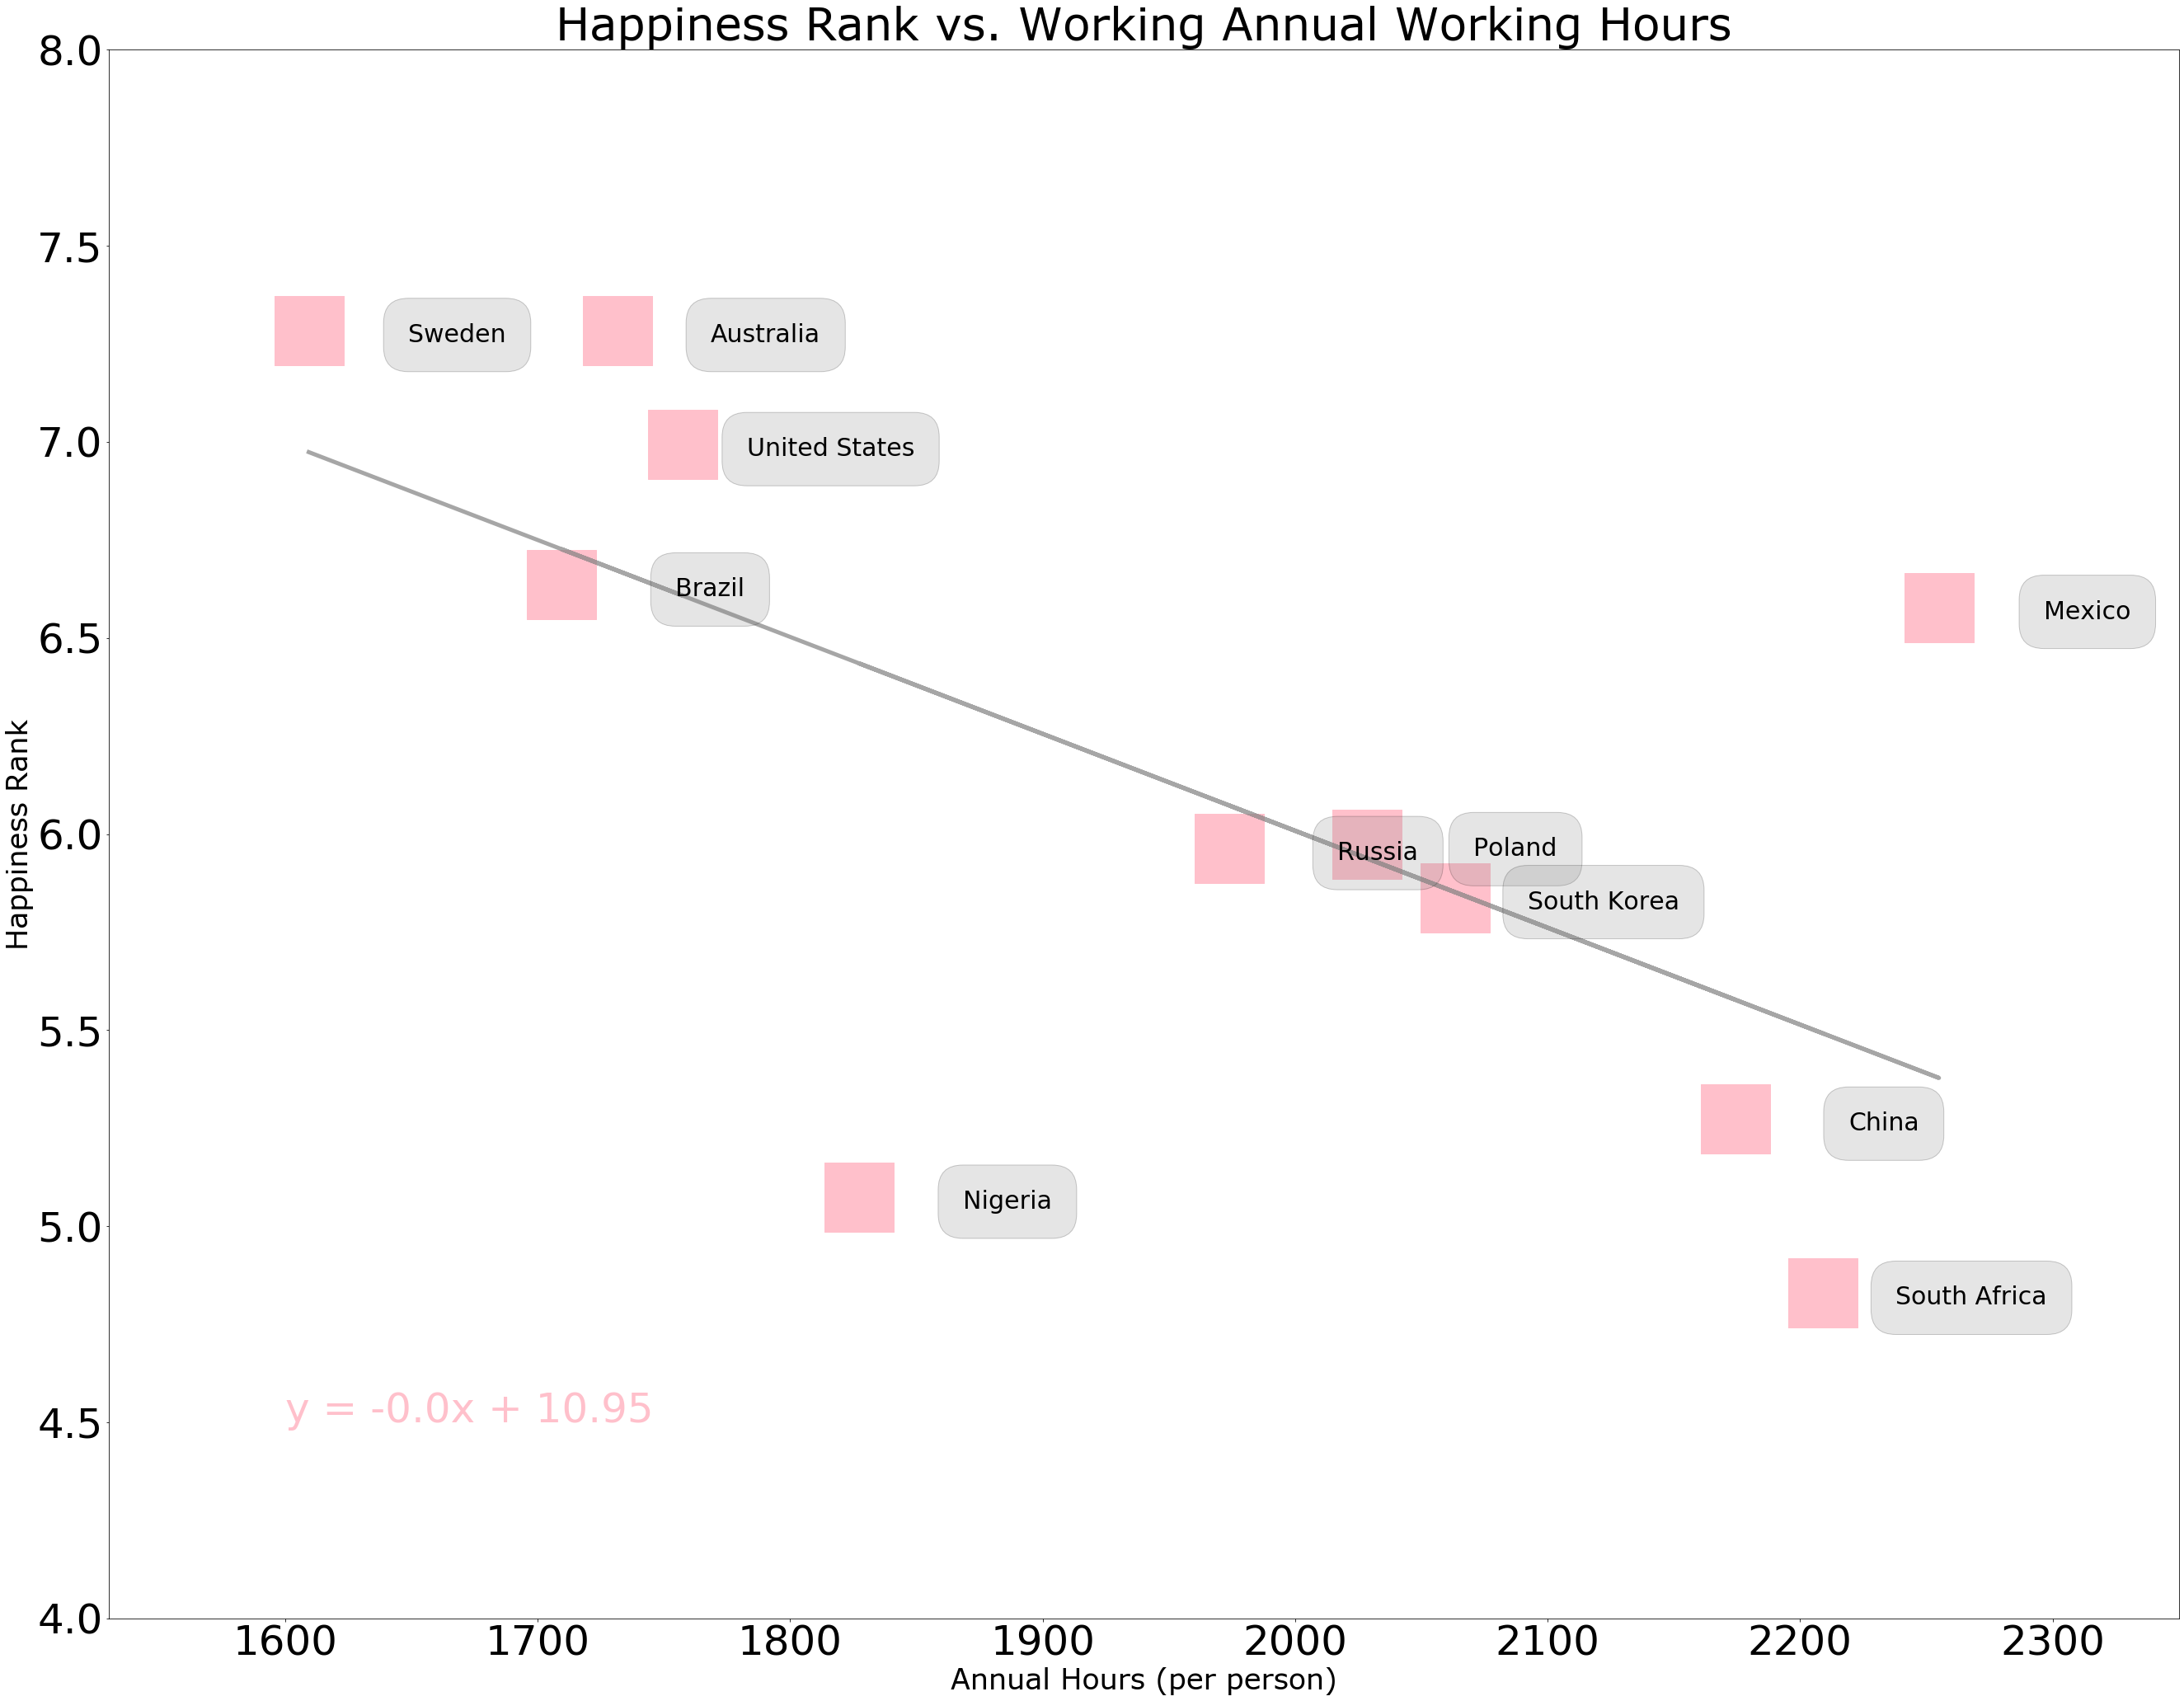

The r-squared is: 0.40750932538551793


<Figure size 432x288 with 0 Axes>

In [8]:
# make the scatter plot for the two factors 
labels = happy_hours_df["Country"]
x_values = happy_hours_df['Annual hours worked per person']
y_values = happy_hours_df['Happiness.Score']

plt.figure(figsize=(45,35))
plt.xlim(1530, 2350)
plt.ylim(4, 8)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Happiness Rank vs. Working Annual Working Hours",fontsize=55,fontname ="Verdana")
plt.xlabel("Annual Hours (per person)",fontsize=35,fontname ="Verdana")
plt.ylabel("Happiness Rank",fontsize=35,fontname ="Verdana")


plt.scatter(x_values,y_values,color='pink',marker="s",s=7000)
plt.plot(x_values,regress_values,"r-",color="gray",linewidth=5,alpha =.7)
plt.annotate(line_eq,(1600,4.5),fontsize=50,color="pink")

for label, x, y in zip(labels, x_values, y_values):
    plt.annotate(
        label,
        xy=(x, y), xytext=(180, -20),
        textcoords='offset points', ha='center',va='bottom', fontsize=30,
        bbox=dict(boxstyle='round,pad=1', fc='gray', alpha=0.2),
        )  

plt.show()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("happiness_selected.png")